In [23]:
from utils.hnsw_module import *
import pandas as pd
from utils.evaluation import * 
data = pd.read_csv('data/embeddings_films.csv', usecols=[i for i in range(2, 386)])
len(data)
train_data = data[:20000]
test_data = np.array(data[20000:])

In [2]:
ms = [8,10,12,16,20,32]
filenames = ["film_m8_ef20","film_m10_ef20","film_m12_ef20","film_m16_ef20","film_m20_ef40", "film_m32_ef50"]
recalls_at_1 = []
recalls_at_10 = []
smetrics = []
hnsw_times = []
brute_times = []

In [3]:
for filename in filenames:
    hnsw = HNSW('euclidean', m=4, ef=20)
    hnsw.load_graph(filename)
    evaluator = KNNEvaluation(train_data, test_data[:1000], hnsw, k=10, ef=10, metric='euclidean')
    recall_at_1, recall_at_10, smetric = evaluator.evaluate_recall()
    recalls_at_1.append(recalls_at_1)
    recalls_at_10.append(recall_at_10)
    smetrics.append(smetric)
    brute_time, hnsw_time = evaluator.compare_time()
    brute_times.append(brute_time)
    hnsw_times.append(hnsw_time)

100%|██████████| 1000/1000 [00:28<00:00, 35.10it/s]


In [25]:
    hnsw = HNSW('euclidean', m=4, ef=20)
    for i in tqdm(range(20000)):
        hnsw.add(train_data.loc[i])   
    evaluator = KNNEvaluation(train_data, test_data[:1000], hnsw, k=10, ef=10, metric='euclidean')
    recall_at_1, recall_at_10, smetric = evaluator.evaluate_recall()
    brute_time, hnsw_time = evaluator.compare_time()


100%|██████████| 1000/1000 [00:19<00:00, 50.75it/s]


In [26]:
recalls_at_10 = np.insert(recalls_at_10, 0, recall_at_10)
hnsw_times = np.insert(hnsw_times, 0, hnsw_time)
brute_times = np.insert(brute_times, 0, brute_time)
smetrics = np.insert(smetrics, 0,smetric)

In [11]:
import matplotlib.pyplot as plt
brute_times

[0.008256270885467529,
 0.009555850982666016,
 0.00936886429786682,
 0.009370829343795777,
 0.008027980089187621,
 0.008657908916473389]

In [16]:
recalls_at_10 = np.delete(recalls_at_10, 1)
smetrics = np.delete(smetrics,1)
hnsw_times = np.delete(hnsw_times,1)
brute_times = np.delete(brute_times,1)

In [12]:
recalls_at_10 = np.array(recalls_at_10)
smetrics = np.array(smetrics)
hnsw_times = np.array(hnsw_times)
brute_times = np.array(brute_times)

In [20]:
hnsw_times, brute_times

(array([0.00933071, 0.01214504, 0.01296349, 0.0155105 , 0.01970937]),
 array([0.00825627, 0.00936886, 0.00937083, 0.00802798, 0.00865791]))

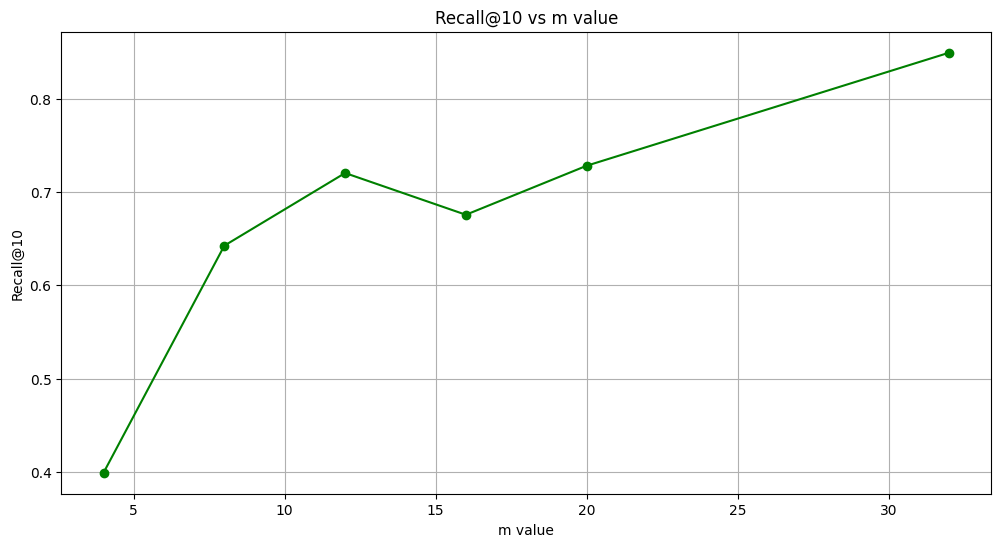

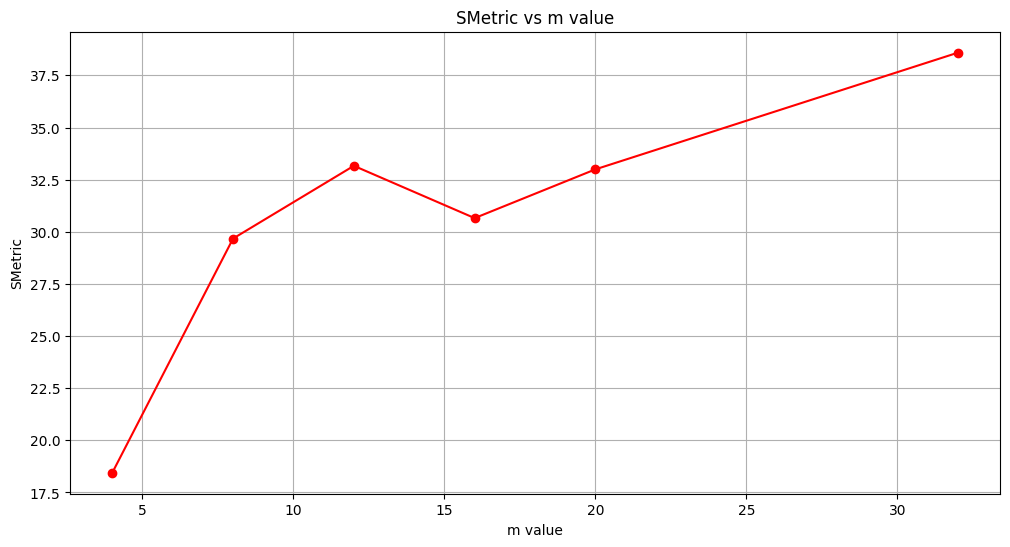

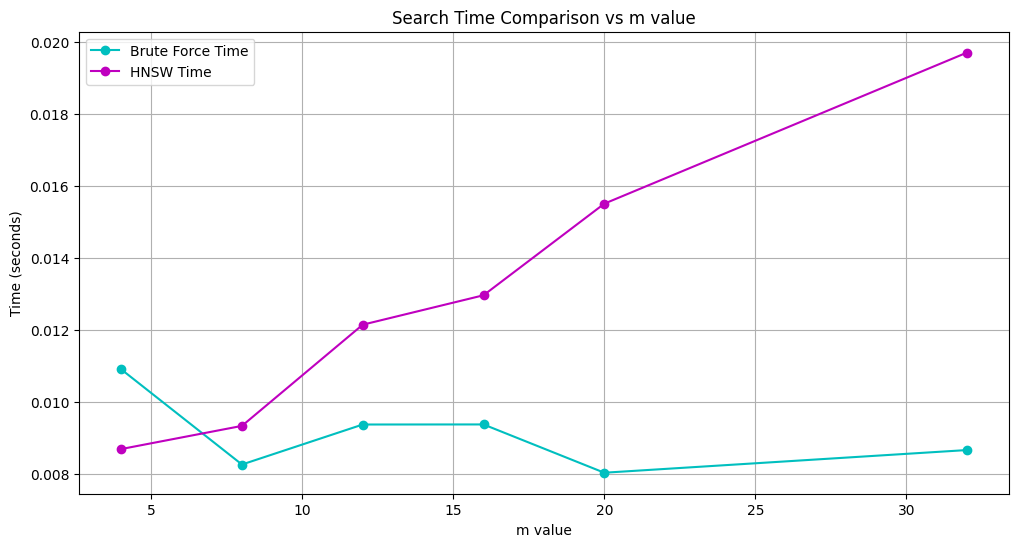

In [27]:
ms = [4,8,12,16,20,32]


# Plot recall@10
plt.figure(figsize=(12, 6))
plt.plot(ms, recalls_at_10, marker='o', linestyle='-', color='g')
plt.xlabel('m value')
plt.ylabel('Recall@10')
plt.title('Recall@10 vs m value')
plt.grid(True)
plt.show()

# Plot smetric
plt.figure(figsize=(12, 6))
plt.plot(ms, smetrics, marker='o', linestyle='-', color='r')
plt.xlabel('m value')
plt.ylabel('SMetric')
plt.title('SMetric vs m value')
plt.grid(True)
plt.show()

# Plot time comparison
plt.figure(figsize=(12, 6))
plt.plot(ms, brute_times, marker='o', linestyle='-', color='c', label='Brute Force Time')
plt.plot(ms, hnsw_times, marker='o', linestyle='-', color='m', label='HNSW Time')
plt.xlabel('m value')
plt.ylabel('Time (seconds)')
plt.title('Search Time Comparison vs m value')
plt.legend()
plt.grid(True)
plt.show()